
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

df = pd.read_csv("sample-superstore-subset-excel.csv")

# Display the first few rows and summary statistics
print(df.head())
df.describe()


To handle missing values, you can use imputation methods like replacing missing data with the mean, median, or mode, or use more advanced techniques like K-Nearest Neighbors (KNN) imputation; alternatively, you can drop rows or columns with missing values if they are minimal or insignificant to the analysis.

In [42]:
# Handle missing values
print(df.isnull().any())

Row ID                  False
Order Priority          False
Discount                False
Unit Price              False
Shipping Cost           False
Customer ID             False
Customer Name           False
Ship Mode               False
Customer Segment        False
Product Category        False
Product Sub-Category    False
Product Container       False
Product Name            False
Product Base Margin      True
Region                  False
State or Province       False
City                    False
Postal Code             False
Order Date              False
Ship Date               False
Profit                  False
Quantity ordered new    False
Sales                   False
Order ID                False
dtype: bool


In [43]:
# Convert data types if necessary
df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

Converting data types before analysis is crucial because incorrect data types can lead to errors or misleading results, as certain operations require specific data formats.

In [ ]:
# Create any new columns needed for analysis

C:\Users\nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Distribution of Sales'}, xlabel='Sales', ylabel='Count'>

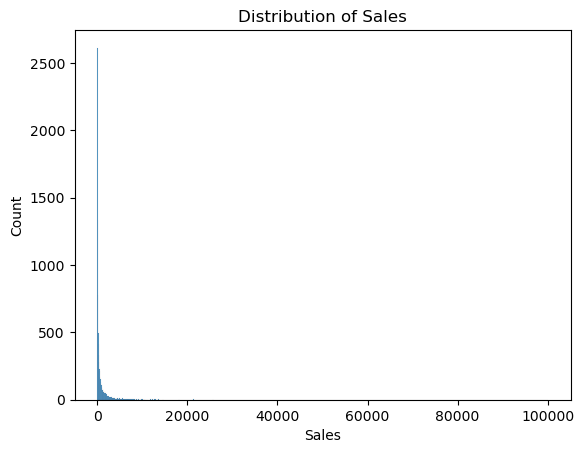

In [6]:
# Univariate analysis
plt.title("Distribution of Sales")
sns.histplot(df["Sales"])

C:\Users\nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Count of Orders by Region'}, xlabel='Region', ylabel='Count'>

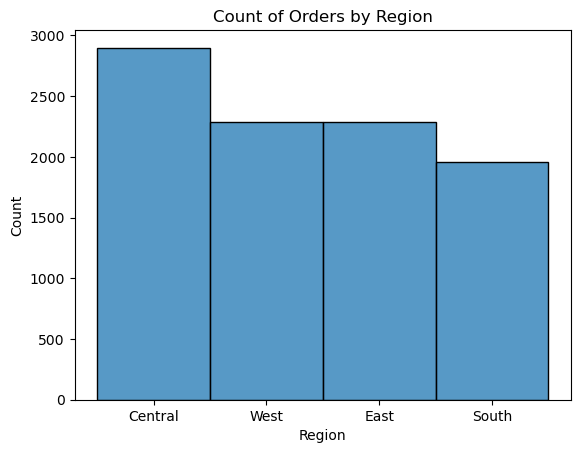

In [44]:
plt.title("Count of Orders by Region")
sns.histplot(df["Region"])

Univariate analysis is the examination of a single variable in a dataset to summarize its characteristics. Its key purposes are to understand the variable's underlying pattern, identify outliers, and provide a foundation for further analysis.

<Axes: title={'center': 'Sales vs. Profit'}, xlabel='Sales', ylabel='Profit'>

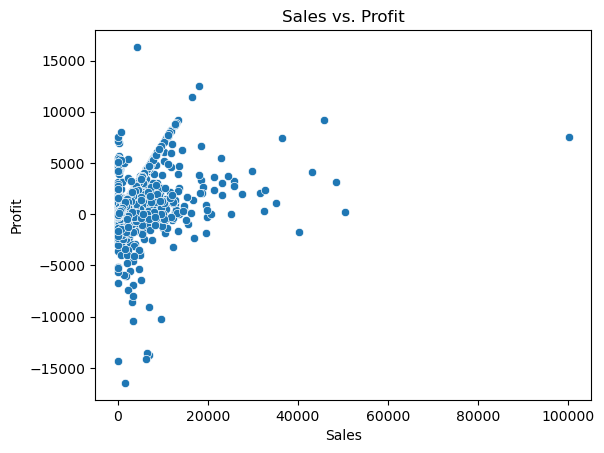

In [8]:
# Bivariate analysis

plt.title("Sales vs. Profit")
sns.scatterplot(x= df["Sales"], y= df["Profit"])

<Axes: title={'center': 'Sales by Region'}, xlabel='Region', ylabel='Sales'>

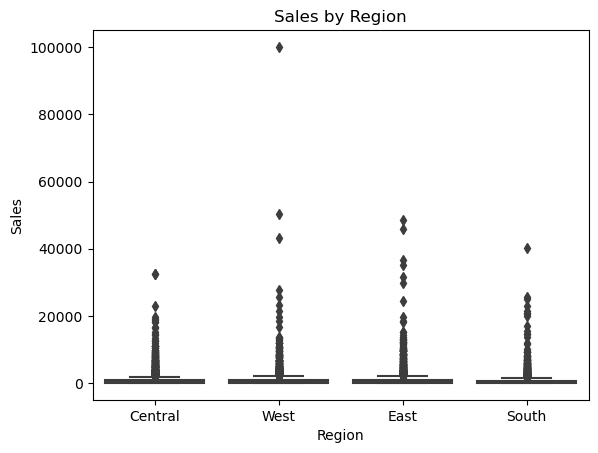

In [9]:
plt.title("Sales by Region")
sns.boxplot(x= df["Region"], y= df["Sales"])

Univariate analysis examines a single variable to summarize its characteristics, such as distribution and central tendency, while bivariate analysis explores the relationship between two variables, such as assessing how advertising spend correlates with sales revenue.

In [11]:
# Summary statistics for key variables
df[["Sales","Profit","Quantity ordered new","Discount"]].describe()

,Sales,Profit,Quantity ordered new,Discount
count,9426.000000,9426.000000,9426.000000,9426.000000
mean,949.706272,139.236410,13.798430,0.049628
std,2598.019818,998.486483,15.107688,0.031798
min,1.320000,-16476.838000,1.000000,0.000000
25%,61.282500,-74.017375,5.000000,0.020000
50%,203.455000,2.567600,10.000000,0.050000
75%,776.402500,140.243850,17.000000,0.080000
max,100119.160000,16332.414000,170.000000,0.250000


In [ ]:
# Grouped statistics


### Conclusion

- Summary of key findings.
- Insights based on the analysis.


Summary of keys finding: Profit and sales have a positive relationship

Insights based on the analysis: Central has the most number of order


## Additional Statistical Analysis


In [14]:
# Example: T-test for sales in different regions
from scipy.stats import ttest_ind, chi2_contingency

east_sales = df[df["Region"] == "East"]["Sales"]
west_sales = df[df["Region"] == "West"]["Sales"]
from scipy.stats import ttest_ind, chi2_contingency
t_stat,p_value = ttest_ind(east_sales,west_sales)
print(t_stat)
print(p_value)


0.12701745344062249
0.8989321714456504


In [15]:
Ho= "Differnt regions has effect on Sales"
Ha= "Differnt regions has no effect on Sales"
if p_value<0.05:
    print(f'{Ho} as the p_value ({p_value.round()})<0.05')
else:
    print(f'{Ha} as the p_value ({p_value.round(3)})>0.05')

Differnt regions has no effect on Sales as the p_value (0.899)>0.05


A T-test is a statistical method used to compare the means of two groups to determine if they are significantly different, such as comparing average sales between two regions to see if the difference is statistically meaningful.

In [16]:
# Example: Chi-square test for independence between Ship Mode and Customer Segment
contingency_table = pd.crosstab(df["Ship Mode"],df["Customer Segment"])
contingency_table

Customer Segment,Consumer,Corporate,Home Office,Small Business
Ship Mode,,,,
Delivery Truck,263,465,299,256
Express Air,222,398,267,220
Regular Air,1409,2512,1750,1365


In [17]:
chi2_stat,p_value,dof,expected = chi2_contingency(contingency_table)
print(chi2_stat)
print(p_value)
print(dof)
Ho= "Ship Mode has effect on Customer Segment"
Ha= "Ship Mode has no effect on Customer Segment"
if p_value<0.05:
    print(f'{Ho} as the p_value ({p_value.round()})<0.05')
else:
    print(f'{Ha} as the p_value ({p_value.round(3)})>0.05')

1.6522944786735398
0.9487444717191827
6
Ship Mode has no effect on Customer Segment as the p_value (0.949)>0.05


The Chi-square test for independence is used to determine whether there is a significant association between two categorical variables, such as testing if the distribution of shipping modes varies significantly across different customer segments.

In [18]:
# Selecting only numeric columns for correlation matrix

num_col = df.select_dtypes(include = ['float64','int64']).columns
correlation_matrix = df[num_col].corr()

correlation_matrix

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
Row ID,1.000000,0.000912,0.007586,0.004780,0.038840,-0.002013,0.033833,-0.006431,-0.574926,-0.220454,0.918587
Discount,0.000912,1.000000,0.001099,-0.002141,-0.005723,0.006801,-0.001707,-0.039467,-0.014062,-0.021286,-0.000055
Unit Price,0.007586,0.001099,1.000000,0.246251,-0.007310,0.061917,0.023104,-0.048559,-0.054415,0.433984,0.009805
Shipping Cost,0.004780,-0.002141,0.246251,1.000000,-0.014462,0.377359,-0.003406,-0.017034,-0.020198,0.310223,0.007070
Customer ID,0.038840,-0.005723,-0.007310,-0.014462,1.000000,-0.020397,-0.086988,0.007962,-0.028248,-0.004937,0.043739
Product Base Margin,-0.002013,0.006801,0.061917,0.377359,-0.020397,1.000000,-0.004380,-0.070798,0.000205,0.117908,0.006821
Postal Code,0.033833,-0.001707,0.023104,-0.003406,-0.086988,-0.004380,1.000000,0.005364,-0.010895,-0.000176,0.037847
Profit,-0.006431,-0.039467,-0.048559,-0.017034,0.007962,-0.070798,0.005364,1.000000,0.124924,0.371583,-0.003428
Quantity ordered new,-0.574926,-0.014062,-0.054415,-0.020198,-0.028248,0.000205,-0.010895,0.124924,1.000000,0.360121,-0.599471
Sales,-0.220454,-0.021286,0.433984,0.310223,-0.004937,0.117908,-0.000176,0.371583,0.360121,1.000000,-0.228260


<Axes: title={'center': 'Correlation Matrix'}>

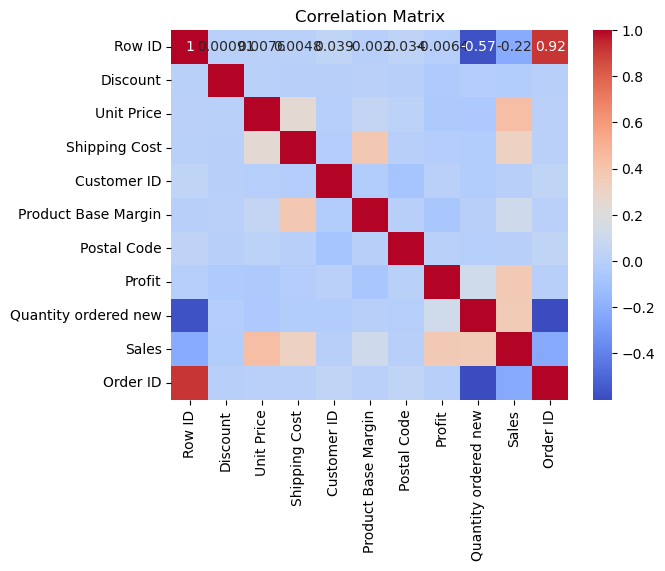

In [19]:
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix,annot=True,cmap = 'coolwarm')

A correlation matrix is beneficial in data analysis as it provides a quick overview of the relationships between multiple variables, allowing for the identification of strong positive or negative correlations, with coefficients close to 1 or -1 indicating strong relationships and those near 0 suggesting weak or no linear association.

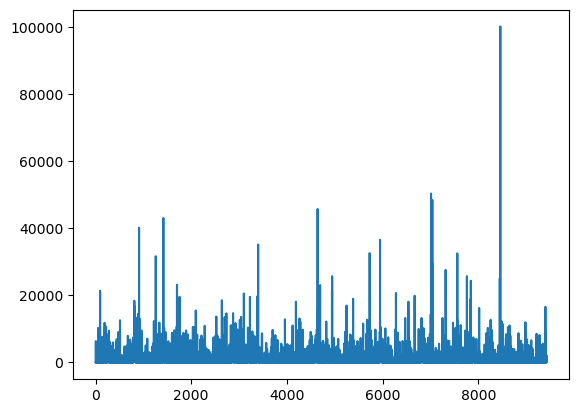

In [47]:
# Plotting sales trends over time
plt.plot(df.index,df["Sales"])

To plot sales trends over time, prepare your dataset by ensuring the time column is in datetime format and the sales column is numeric, then aggregate the data by time intervals and use tools like Python’s Matplotlib or Excel’s line charts to visualize sales trends with time on the x-axis and sales on the y-axis.

                  0
Order Date         
2012-05-28     5.90
2010-07-07    13.01
2011-07-27    49.92
2011-07-27    41.64
2011-07-27  1446.67
...             ...
2013-05-14   447.87
2013-05-14    13.23
2013-09-12  2215.93
2010-02-08   506.50
2013-09-12   172.48

[9426 rows x 1 columns]


<Axes: xlabel='Order Date'>

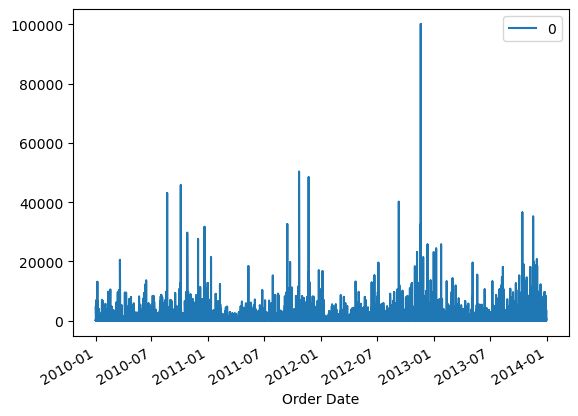

In [51]:
# Resample sales data by month
df["Order Date"] = pd.to_datetime(df["Order Date"])
df_monthy_sales = pd.DataFrame(index = df["Order Date"],data = df["Sales"].values)
print(df_monthy_sales)
m_sales = df_monthy_sales[0].resample('M').sum()
df_monthy_sales.plot()

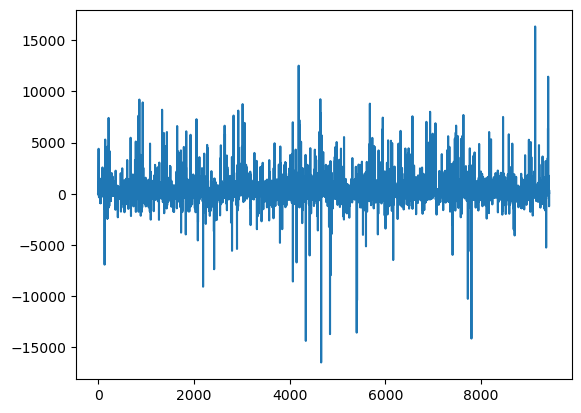

In [48]:
# Plotting profit trends over time
plt.plot(df.index,df["Profit"])

To identify top-performing product categories, aggregate sales and profit data by category, calculate the total sales and profit for each, and then rank the categories based on these metrics to determine the highest performers.

In [26]:
# Identifying top-performing product categories based on total sales and profit

<Axes: title={'center': 'Total Sales by Product Category'}, xlabel='Product Category', ylabel='Sales'>

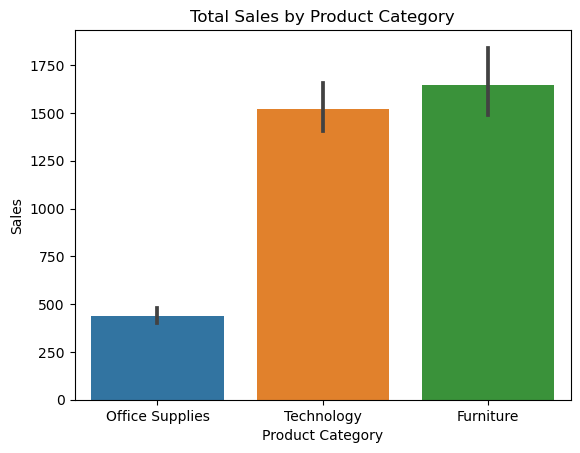

In [24]:
# Plotting total sales by product category
plt.title("Total Sales by Product Category")
sns.barplot(x= df["Product Category"], y= df["Sales"])

<Axes: title={'center': 'Total Profit by Product Category'}, xlabel='Product Category', ylabel='Profit'>

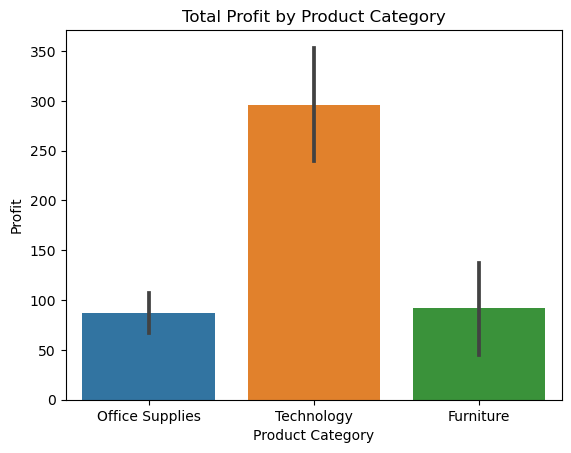

In [27]:
# Plotting total profit by product category
plt.title("Total Profit by Product Category")
sns.barplot(x= df["Product Category"], y= df["Profit"])

In [28]:
# Generating summary statistics for each region
df.groupby("Region")["Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Central,2899.0,876.282035,2041.342685,2.24,60.0450,203.370,771.0350,32589.59
East,2289.0,1058.455518,2802.669839,1.32,63.3500,225.140,815.7500,48418.58
South,1954.0,817.475036,2173.877698,2.66,58.2500,180.375,644.9375,40136.93
West,2284.0,1047.039755,3258.451329,1.62,63.2225,204.730,870.7200,100119.16


In [29]:
# Display summary statistics
print(df.describe())

             Row ID     Discount   Unit Price  Shipping Cost  Customer ID  \
count   9426.000000  9426.000000  9426.000000    9426.000000  9426.000000   
mean   20241.015277     0.049628    88.303686      12.795142  1738.422236   
min        2.000000     0.000000     0.990000       0.490000     2.000000   
25%    19330.250000     0.020000     6.480000       3.192500   898.000000   
50%    21686.500000     0.050000    20.990000       6.050000  1750.000000   
75%    24042.750000     0.080000    85.990000      13.990000  2578.750000   
max    26399.000000     0.250000  6783.020000     164.730000  3403.000000   
std     6101.890965     0.031798   281.540982      17.181203   979.167197   

       Product Base Margin   Postal Code                     Order Date  \
count          9354.000000   9426.000000                           9426   
mean              0.512189  52446.327286  2012-03-05 18:33:59.465308672   
min               0.350000   1001.000000            2010-01-01 00:00:00   
25%   

<Axes: xlabel='Sales', ylabel='Profit'>

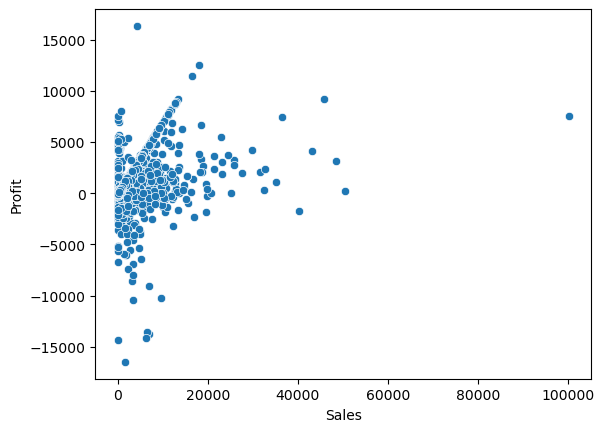

In [30]:
# Visualizing the correlation between sales and profit
sns.scatterplot(x = "Sales",y="Profit",data = df)

In [52]:
# Displaying the correlation coefficient
correlation = df['Sales'].corr(df['Profit'])

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.3715830697679458


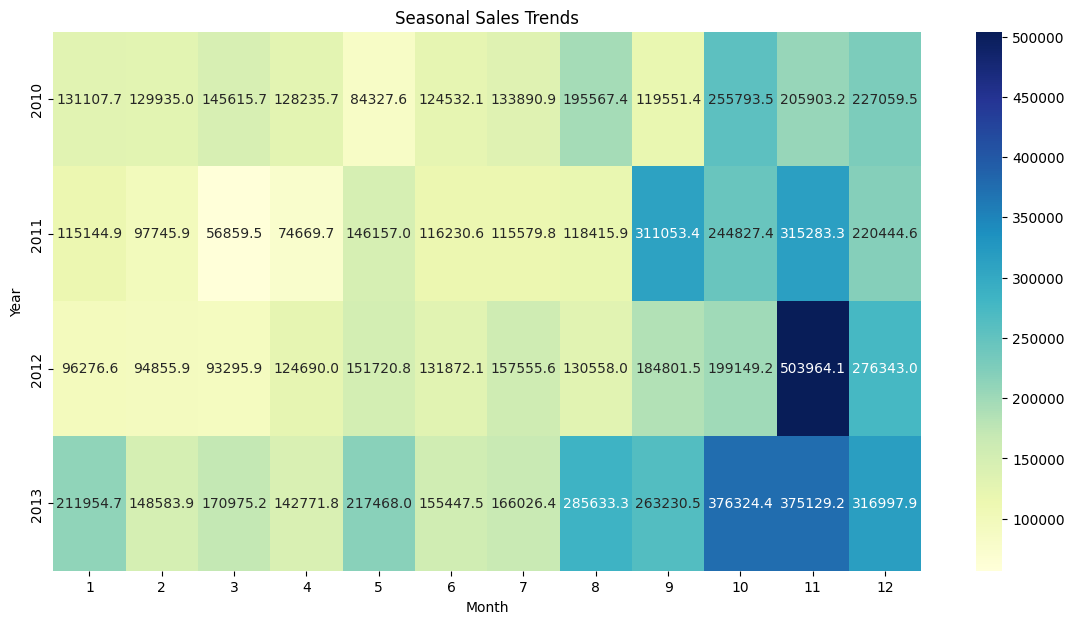

In [ ]:

# Analyzing seasonal sales trends




# Grouping sales data by month and year



# Plotting seasonal sales trends









<Axes: xlabel='Ship Mode', ylabel='Sales'>

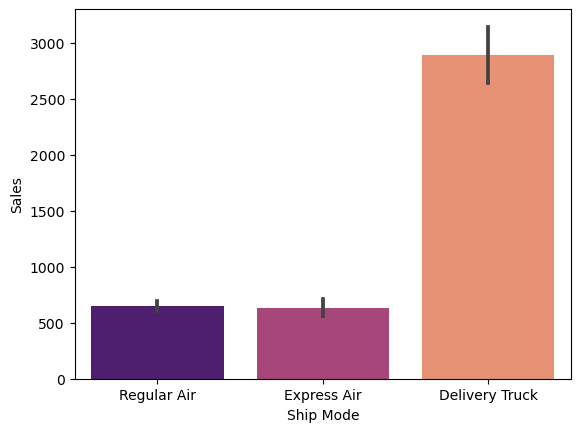

In [31]:
# Comparing sales across different ship modes
sns.barplot(x=df["Ship Mode"], y=df["Sales"], palette='magma')

In [ ]:
# Ensure column names are clean

In [39]:
# Print column names to verify
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [ ]:
# Ensure 'Ship Date' column is datetime type

In [33]:
# Dropping rows where 'Ship Date' couldn't be converted
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Ship Date"].dtypes





C:\Users\nares\AppData\Local\Temp\ipykernel_1348\1308861327.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Ship Date"] = pd.to_datetime(df["Ship Date"])


dtype('<M8[ns]')

In [36]:
# Resample sales data by month
monthly_data = df.resample('M', on='Ship Date')

In [38]:
print(monthly_data)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]
